# Setup

In [2]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [3]:
hyp_thresh = 61

IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

figpath = '../figures/'

# Get Data

In [4]:
ds_mask = xr.open_dataset('../data/coastal_mask.nc')
ds_mask

<xarray.Dataset>
Dimensions:         (lat: 138, lat_ro: 138, lat_woa: 35, loc_wod: 319845, loc_wod18: 299294, lon: 226, lon_ro: 216, lon_woa: 55)
Coordinates:
  * lat             (lat) float64 -1.5 -1.25 -1.0 -0.75 ... 32.25 32.5 32.75
  * lon             (lon) float64 48.5 48.75 49.0 49.25 ... 104.2 104.5 104.8
  * lat_ro          (lat_ro) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * lon_ro          (lon_ro) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat_woa         (lat_woa) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * lon_woa         (lon_woa) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * loc_wod         (loc_wod) int64 0 1 2 3 4 ... 319841 319842 319843 319844
  * loc_wod18       (loc_wod18) int64 0 1 2 3 4 ... 299290 299291 299292 299293
Data variables:
    mask            (lat, lon) float64 ...
    maskw           (lat, lon) float64 ...
    maskw_ro        (lat_ro, lon_ro) int64 ...
    maskn           (lat, lon) float64 ...
    maskw_woa      

In [5]:
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                (pres: 57, time_eAS: 23134, time_eBoB: 20710, time_wAS: 31230, time_wBoB: 2847)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1948-06-12 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1948-03-14 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1951-04-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1948-06-29 ... 2020-05-29
  * pres                   (pres) int64 0 5 10 15 20 ... 1350 1400 1450 1500
Data variables:
    lat_wAS                (time_wAS) float32 ...
    lon_wAS                (time_wAS) float32 ...
    mon_wAS                (time_wAS) int64 ...
    seas_wAS               (time_wAS) int64 ...
    lat_eAS                (time_eAS) float32 ...
    lon_eAS                (time_eAS) float32 ...
    mon_eAS                (time_eAS) int64 ...
    seas_eAS               (time_eAS) int64 ...
    lat_wBoB               (time_wBoB) float32 ...
    lon_w

# Find data distanced from coast in each basin

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykerne

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykerne

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mea

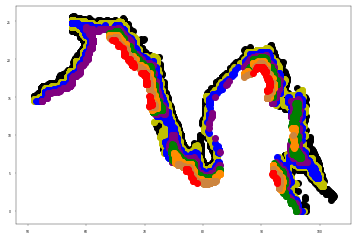

In [31]:


clrs = ['k','y','b','purple','g','darkorange','peru','r']

bins = list(np.arange(0,340,40))
bins_cen = np.arange(20,320,40)

doxy_wAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
doxy_eAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
doxy_wBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
doxy_eBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)

temp_wAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
temp_eAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
temp_wBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
temp_eBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)

sal_wAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
sal_eAS = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
sal_wBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)
sal_eBoB = np.full((ds_WOD.pres.shape[0],len(bins_cen),2),np.nan)


for ii in range(len(bins)-1):
    mask_tmp = np.array(ds_mask.mask)

    ind = (mask_tmp > bins[ii]) & (mask_tmp <= bins[ii+1])
    mask_tmp[~ind] = np.nan
    
    ############### Western Arabian Sea ######################
    mask_wAS = mask_coast(ds_WOD.lat_wAS,ds_WOD.lon_wAS,mask_tmp,ds_mask.lat,ds_mask.lon)
    if np.sum(mask_wAS) != 0:
        doxy = ds_WOD.doxy_wAS[mask_wAS,:]
        temp = ds_WOD.temp_wAS[mask_wAS,:]
        sal = ds_WOD.sal_wAS[mask_wAS,:]
        seas = ds_WOD.seas_wAS[mask_wAS]
        
        doxy_wAS[:,ii,0] = np.nanmean(doxy[seas == 0,:],0)
        doxy_wAS[:,ii,1] = np.nanmean(doxy[seas == 1,:],0)
        temp_wAS[:,ii,0] = np.nanmean(temp[seas == 0,:],0)
        temp_wAS[:,ii,1] = np.nanmean(temp[seas == 1,:],0)
        sal_wAS[:,ii,0] = np.nanmean(sal[seas == 0,:],0)
        sal_wAS[:,ii,1] = np.nanmean(sal[seas == 1,:],0)
    
    plt.scatter(ds_WOD.lon_wAS[mask_wAS],ds_WOD.lat_wAS[mask_wAS], c = clrs[ii])
    
    ########### Eastern Arabian Sea ######################

    mask_eAS = mask_coast(ds_WOD.lat_eAS,ds_WOD.lon_eAS,mask_tmp,ds_mask.lat,ds_mask.lon)
    
    if np.sum(mask_eAS) != 0:
        doxy = ds_WOD.doxy_eAS[mask_eAS,:]
        temp = ds_WOD.temp_eAS[mask_eAS,:]
        sal = ds_WOD.sal_eAS[mask_eAS,:]
        seas = ds_WOD.seas_eAS[mask_eAS]
        
        doxy_eAS[:,ii,0] = np.nanmean(doxy[seas == 0,:],0)
        doxy_eAS[:,ii,1] = np.nanmean(doxy[seas == 1,:],0)
        temp_eAS[:,ii,0] = np.nanmean(temp[seas == 0,:],0)
        temp_eAS[:,ii,1] = np.nanmean(temp[seas == 1,:],0)
        sal_eAS[:,ii,0] = np.nanmean(sal[seas == 0,:],0)
        sal_eAS[:,ii,1] = np.nanmean(sal[seas == 1,:],0)
        
    plt.scatter(ds_WOD.lon_eAS[mask_eAS],ds_WOD.lat_eAS[mask_eAS],c = clrs[ii])
    ########### Western Bay of Bengal ######################
    mask_wBoB = mask_coast(ds_WOD.lat_wBoB,ds_WOD.lon_wBoB,mask_tmp,ds_mask.lat,ds_mask.lon)
    if np.sum(mask_wBoB) != 0:
        doxy = ds_WOD.doxy_wBoB[mask_wBoB,:]
        temp = ds_WOD.temp_wBoB[mask_wBoB,:]
        sal = ds_WOD.sal_wBoB[mask_wBoB,:]
        seas = ds_WOD.seas_wBoB[mask_wBoB]
        
        doxy_wBoB[:,ii,0] = np.nanmean(doxy[seas == 0,:],0)
        doxy_wBoB[:,ii,1] = np.nanmean(doxy[seas == 1,:],0)
        temp_wBoB[:,ii,0] = np.nanmean(temp[seas == 0,:],0)
        temp_wBoB[:,ii,1] = np.nanmean(temp[seas == 1,:],0)
        sal_wBoB[:,ii,0] = np.nanmean(sal[seas == 0,:],0)
        sal_wBoB[:,ii,1] = np.nanmean(sal[seas == 1,:],0)
        
    plt.scatter(ds_WOD.lon_wBoB[mask_wBoB],ds_WOD.lat_wBoB[mask_wBoB],c = clrs[ii])

    ########### Eastern Bay of Bengal ######################
    mask_eBoB = mask_coast(ds_WOD.lat_eBoB,ds_WOD.lon_eBoB,mask_tmp,ds_mask.lat,ds_mask.lon)
    
    if np.sum(mask_eBoB) != 0:
        doxy = ds_WOD.doxy_eBoB[mask_eBoB,:]
        temp = ds_WOD.temp_eBoB[mask_eBoB,:]
        sal = ds_WOD.sal_eBoB[mask_eBoB,:]
        seas = ds_WOD.seas_eBoB[mask_eBoB]
        
        doxy_eBoB[:,ii,0] = np.nanmean(doxy[seas == 0,:],0)
        doxy_eBoB[:,ii,1] = np.nanmean(doxy[seas == 1,:],0)
        temp_eBoB[:,ii,0] = np.nanmean(temp[seas == 0,:],0)
        temp_eBoB[:,ii,1] = np.nanmean(temp[seas == 1,:],0)
        sal_eBoB[:,ii,0] = np.nanmean(sal[seas == 0,:],0)
        sal_eBoB[:,ii,1] = np.nanmean(sal[seas == 1,:],0)
        
    plt.scatter(ds_WOD.lon_eBoB[mask_eBoB],ds_WOD.lat_eBoB[mask_eBoB],c = clrs[ii])
    

# Transects

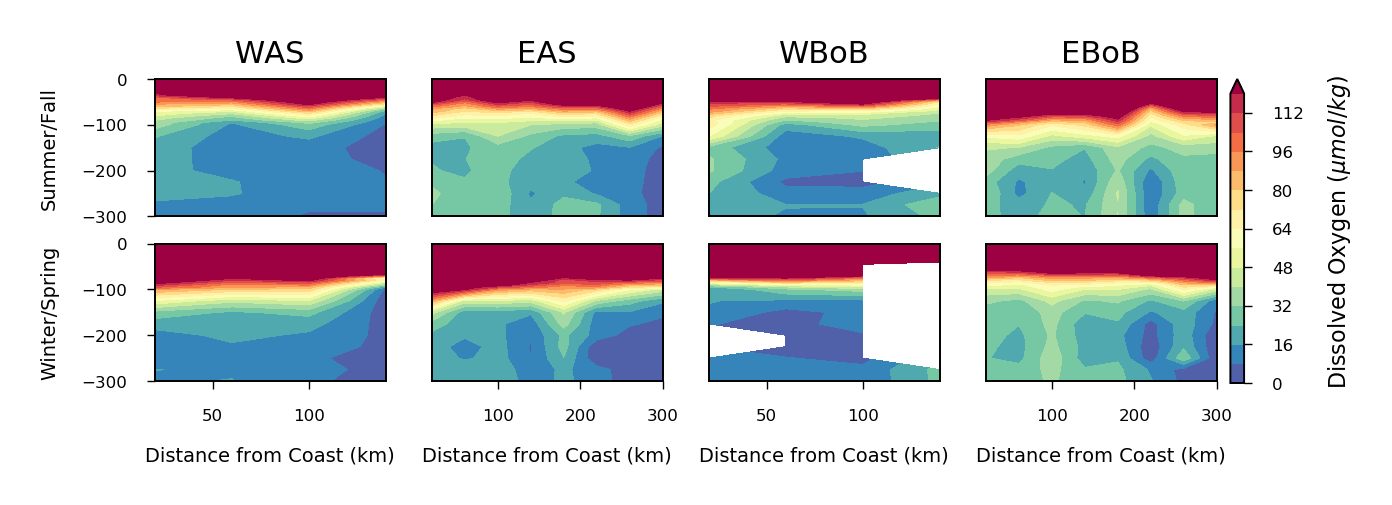

In [74]:
fig = plt.figure(figsize=(8.7 / 2.54, 1), dpi=400)

params = {'legend.fontsize': 3,
         'axes.labelsize': 3.5,
         'axes.titlesize': 5.5,
         'xtick.labelsize':3,
         'ytick.labelsize':3,
         'axes.linewidth':0.35,
         'xtick.major.width':0.25,
         'xtick.major.size':1.5,
         'ytick.major.width':0.25,
         'ytick.major.size':1.5}

pylab.rcParams.update(params)

cmin = 0
cmax = 125
cmap = 'Spectral_r'
levels = np.arange(cmin,cmax,8)

regions = ['WAS','EAS','WBoB','EBoB']

cnt = 1
for ss in range(1,-1,-1):
    for rr in range(1,5):

        ax = fig.add_subplot(2,4,cnt)

        if rr == 1:
            var = doxy_wAS[:,:,ss]
            ax.set_xlim([20,140])
        if rr == 2:
            var = doxy_eAS[:,:,ss]
            ax.set_xlim([20,300])
            ax.set_yticks([])
        if rr == 3:
            var = doxy_wBoB[:,:,ss]
            ax.set_xlim([20,140])
            ax.set_yticks([])
        if rr == 4:
            var = doxy_eBoB[:,:,ss]
            ax.set_xlim([20,300])
            ax.set_yticks([])

        cf = ax.contourf(bins_cen,-1*ds_WOD.pres,var, levels = levels, cmap = cmap, extend = 'max')
        cf.set_clim(cmin, cmax)
        ax.set_ylim([-300,0])
        if ss == 0:
            ax.set_xlabel('Distance from Coast (km)')
            if rr == 1:
                ax.set_ylabel('Winter/Spring')
        else:
            ax.set_xticks([])
            ax.set_title(regions[rr-1], pad = 3)
            if rr == 1:
                ax.set_ylabel('Summer/Fall')
            
        
        
        cnt = cnt+1

cbar_ax = fig.add_axes([.91, 0.12, 0.01, 0.76])
cbar = fig.colorbar(cf,cax=cbar_ax, pad=0.04)
cbar.set_label('Dissolved Oxygen ($\mu mol/kg$)', size = 4)



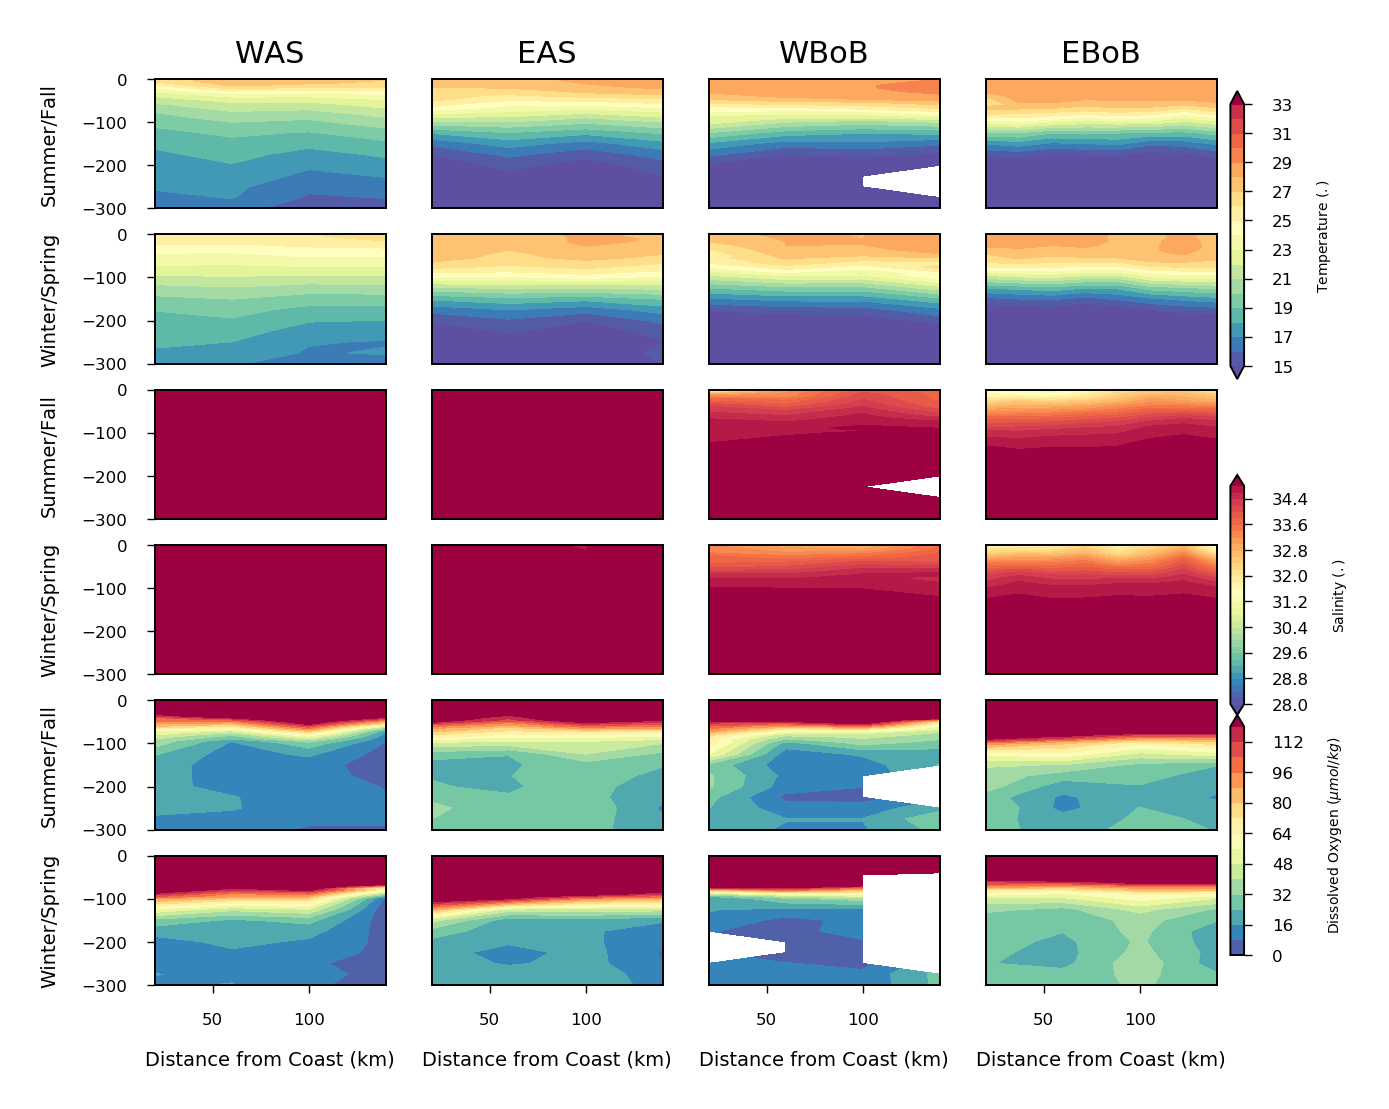

In [71]:
fig = plt.figure(figsize=(8.7 / 2.54, 3), dpi=400)

params = {'legend.fontsize': 3,
         'axes.labelsize': 3.5,
         'axes.titlesize': 5.5,
         'xtick.labelsize':3,
         'ytick.labelsize':3,
         'axes.linewidth':0.35,
         'xtick.major.width':0.25,
         'xtick.major.size':1.5,
         'ytick.major.width':0.25,
         'ytick.major.size':1.5}

pylab.rcParams.update(params)

cmin = 0
cmax = 125
cmap = 'Spectral_r'
levels = np.arange(cmin,cmax,8)

regions = ['WAS','EAS','WBoB','EBoB']

cnt = 1
for pp in range(3):
    
    if pp == 0:
        cmin = 15
        cmax = 34
        levels = np.arange(cmin,cmax,1)
        extend = 'both'
    elif pp == 1:
        cmin = 28
        cmax = 35
        levels = np.arange(cmin,cmax,.2)
        extend = 'both'
    else:
        cmin = 0
        cmax = 125
        levels = np.arange(cmin,cmax,8)
        extend = 'max'
        
    for ss in range(1,-1,-1):
        for rr in range(1,5):

            ax = fig.add_subplot(6,4,cnt)

            if rr == 1:
                if pp == 0:
                    var = temp_wAS[:,:,ss]
                    ax.set_xlim([20,140])
                elif pp == 1:
                    var = sal_wAS[:,:,ss]
                    ax.set_xlim([20,140])
                else:
                    var = doxy_wAS[:,:,ss]
                    ax.set_xlim([20,140])
            if rr == 2:
                if pp == 0:
                    var = temp_eAS[:,:,ss]
                    ax.set_xlim([20,140])
                elif pp == 1:
                    var = sal_eAS[:,:,ss]
                    ax.set_xlim([20,140])
                else:
                    var = doxy_eAS[:,:,ss]
                    ax.set_xlim([20,140])
                ax.set_yticks([])
            if rr == 3:
                if pp == 0:
                    var = temp_wBoB[:,:,ss]
                    ax.set_xlim([20,140])
                elif pp == 1:
                    var = sal_wBoB[:,:,ss]
                    ax.set_xlim([20,140])
                else:
                    var = doxy_wBoB[:,:,ss]
                    ax.set_xlim([20,140])
                ax.set_yticks([])
            if rr == 4:
                if pp == 0:
                    var = temp_eBoB[:,:,ss]
#                     ax.set_xlim([20,140])
                elif pp == 1:
                    var = sal_eBoB[:,:,ss]
#                     ax.set_xlim([20,140])
                else:
                    var = doxy_eBoB[:,:,ss]
                    ax.set_xlim([20,140])
                ax.set_yticks([])

            cf = ax.contourf(bins_cen,-1*ds_WOD.pres,var, levels = levels, cmap = cmap, extend = extend)
            if pp == 0:
                cf_temp = cf
            elif pp == 1:
                cf_sal = cf
            else:
                cf_doxy = cf
            cf.set_clim(cmin, cmax)
            ax.set_ylim([-300,0])
            if ss == 0:
                if pp == 2:
                    ax.set_xlabel('Distance from Coast (km)')
                if rr == 1:
                    ax.set_ylabel('Winter/Spring')
                if pp != 2:
                    ax.set_xticks([])
            elif ss == 1:
                if pp == 0:
                    ax.set_title(regions[rr-1], pad = 3)
                if rr == 1:
                    ax.set_ylabel('Summer/Fall')
                ax.set_xticks([])
        
            cnt = cnt+1

cbar_ax = fig.add_axes([.91, 0.63, 0.01, 0.24])
cbar = fig.colorbar(cf_temp,cax=cbar_ax, pad=0.04)
cbar.set_label('Temperature ($ .$)', size = 2.5)

cbar_ax = fig.add_axes([.91, 0.35, 0.01, 0.2])
cbar = fig.colorbar(cf_sal,cax=cbar_ax, pad=0.04)
cbar.set_label('Salinity ($. $)', size = 2.5)

cbar_ax = fig.add_axes([.91, 0.15, 0.01, 0.2])
cbar = fig.colorbar(cf_doxy,cax=cbar_ax, pad=0.04)
cbar.set_label('Dissolved Oxygen ($\mu mol/kg$)', size = 2.5)


# Distribution of Observations over the Annual Cycle